In [1]:
from houseofwine_gr import get
get('http://www.houseofwine.gr/how/megas-oinos-skoura.html')


{'ageable': True,
 'alcohol_%': 13.5,
 'avg_rating_%': 81,
 'color': 'Ερυθρός',
 'description': 'Στιβαρό ερυθρό κρασί παλαίωσης. Βασίζεται σε χαρμάνι που παντρεύει το πικάντικο σκέρτσο του Αγιωργίτικου με την αυστηρή δύναμη του Cabernet Sauvignon, στη ζεστή και βανιλάτη αγκαλιά του δρύινου βαρελιού που τα φιλοξένησε κατά την 20μηνη παλαίωσή του. Ποιοτική ετικέτα για μεγάλα φαγοπότια ή εκλεκτά κελάρια.',
 'drink_now': False,
 'keep_2_3_years': False,
 'n_votes': 27,
 'name': 'Μέγας Οίνος Σκούρα 2014',
 'price': 20.9,
 'tags': ['Ξηρός', 'Ήπιος', 'Cabernet Sauvignon', 'Αγιωργίτικο'],
 'url': 'http://www.houseofwine.gr/how/megas-oinos-skoura.html',
 'year': 2014}

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns

plt.style.use('fivethirtyeight')    #①

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Serif'
mpl.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.grid'] =False
plt.rcParams['figure.facecolor']='white'    #②

df = pd.read_json('/home/qiwsir/Documents/DataAnalysis/chapter04/greek-wines-analysis/data/houseofwine.gr-wines.json', encoding='utf-8')  #③
df.head()


,ageable,alcohol_%,avg_rating_%,color,description,drink_now,keep_2_3_years,n_votes,name,price,tags,url,year
0,False,8.5,,Λευκός,Κάποια από τα Riesling του Rheingau της Γερμαν...,False,True,,Riesling Spatlese 2013,33.7,"[Riesling, Ήπιος, Ημίγλυκος]",http://www.houseofwine.gr/how/riesling-spatles...,2013.0
1,False,13.5,,Λευκός,Τυπικό Νέο-Ζηλανδέζικο Sauvignon Blanc από ένα...,True,False,,Spy Valley - Sauvignon Blanc 2016,18.3,"[Ήπιος, Sauvignon Blanc, Ξηρός]",http://www.houseofwine.gr/how/spy-valley-sauvi...,2016.0
2,True,13.0,,Ερυθρός,Η κορωνίδα του Κτήματος Χρυσοχόου και ταυτόχρο...,False,False,,Cava Χρυσοχόου 2008,25.0,"[Ήπιος, Ξηρός, Ξινόμαυρο, Merlot]",http://www.houseofwine.gr/how/cava-hrysohoou.html,2008.0
3,False,12.5,90,Λευκός,Ένα από τα δημοφιλέστερα λευκά κρασιά στην Ελλ...,True,False,27,Κτήμα Γεροβασιλείου - Λευκός 2016,12.1,"[Ήπιος, Ξηρός, Ασύρτικο, Μαλαγουζιά]",http://www.houseofwine.gr/how/ktima-gerovasile...,2016.0
4,False,13.5,,Ερυθρός,Εισαγωγή στα κρασιά από τη γηγενή ποικιλία της...,False,True,,Landskroon - Pinotage 2013,13.1,"[Ήπιος, Ξηρός, Pinotage]",http://www.houseofwine.gr/how/landskroon-pinot...,2013.0


In [4]:
import numpy as np
df = df.replace('', np.nan, regex=True)
df = df.rename(columns={'alcohol_%': 'alcohol', 'avg_rating_%': 'avg_rating'}, inplace=False)

In [5]:
df['alcohol'] = df.alcohol.astype(float)
df['n_votes'] = df.n_votes.astype(int, errors='ignore')
df['price'] = df.price.astype(float)
df['year'] = df.year.astype(int, errors='ignore')


In [6]:
df['color'] = df.color.replace({'Λευκός': 'White', 'Ερυθρός': 'Red', 'Ροζέ': 'Rosé'})

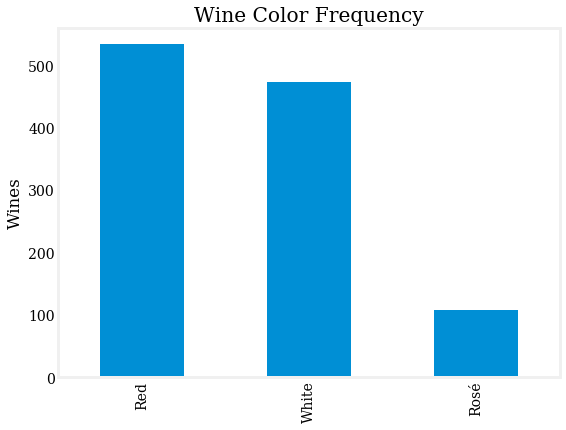

In [7]:
ax = df['color'].value_counts().plot('bar')
ax.set(ylabel='Wines', title='Wine Color Frequency')


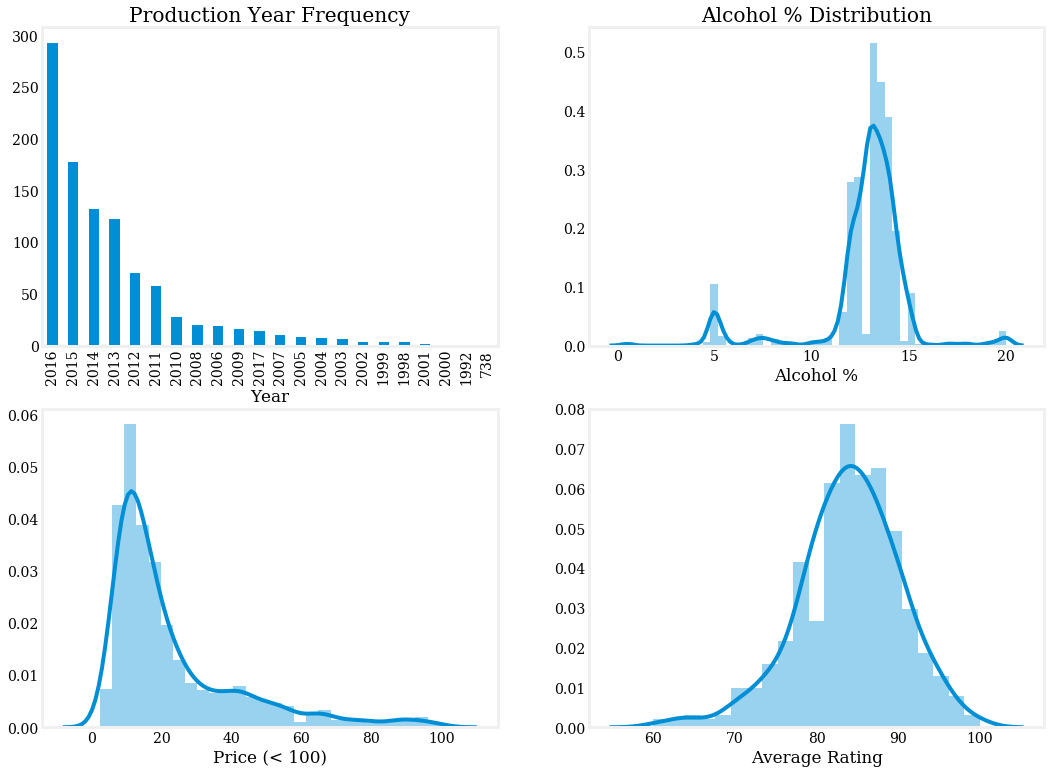

In [8]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16,12))

df.year.dropna().astype(int).value_counts().plot('bar', ax=ax1)
ax1.set(title='Production Year Frequency', xlabel='Year');

sns.distplot(df[df.alcohol < 100].alcohol.dropna(), ax=ax2)    #①
ax2.set(xlabel='Alcohol %', title='Alcohol % Distribution');

sns.distplot(df[df.price < 100].price.dropna(), ax=ax3)    #②
ax3.set(xlabel='Price (< 100)')

sns.distplot(df.avg_rating.dropna(), ax=ax4)
ax4.set(xlabel='Average Rating');


In [9]:
wine_name = df['name']
laf_name = []
for name in wine_name:
    try:
        name_lst = name.split()
        if "Lafite" in name_lst:
            laf_name.append(name)
            #laf = df[df['name']==name]
    except:
        pass
print(laf_name)


['Château Lafite Rothschild 2005']


In [10]:
laf = df[df['name']==laf_name[0]]
laf[['name', 'price', 'year', 'color', 'avg_rating', 'alcohol']]


,name,price,year,color,avg_rating,alcohol
16,Château Lafite Rothschild 2005,3100.0,2005.0,Red,NaN,12.5


In [11]:
df.tags.head(10)

0                         [Riesling, Ήπιος, Ημίγλυκος]
1                      [Ήπιος, Sauvignon Blanc, Ξηρός]
2                    [Ήπιος, Ξηρός, Ξινόμαυρο, Merlot]
3                 [Ήπιος, Ξηρός, Ασύρτικο, Μαλαγουζιά]
4                             [Ήπιος, Ξηρός, Pinotage]
5                           [Ήπιος, Sangiovese, Ξηρός]
6                            [Ήπιος, Ξηρός, Ξινόμαυρο]
7    [Cabernet Sauvignon, Ήπιος, 13, Ξηρός, Merlot,...
8                                      [Ήπιος, Γλυκός]
9                               [Ήπιος, Αηδάνι, Ξηρός]
Name: tags, dtype: object

In [12]:
df['tags'] = df.tags.map(set)    #①
sweetness_values = {'Γλυκός', 'Ημίγλυκος', 'Ξηρός', 'Ημίξηρος'}    #②

df['sweetness'] = df.tags.map(sweetness_values.intersection).map(lambda x: x.pop() if x else None)    #③

translations = {'Γλυκός': 'Sweet', 'Ημίγλυκος': 'Semi-Sweet', 'Ξηρός': 'Dry', 'Ημίξηρος': 'Semi-Dry'}
df['sweetness'] = df['sweetness'].replace(translations)    #④


In [13]:
df['sparkling'] = df.tags.map({'Αφρώδης', 'Ημιαφρώδης'}.intersection
                         ).map(lambda x: x.pop() if x else None
                          ).replace({'Αφρώδης': 'Sparkling', 'Ημιαφρώδης': 'Semi-Sparkling'}
)
df['sparkling'] = df.sparkling.fillna('Not Sparkling')


In [14]:
df['is_mild'] = df.tags.map(lambda x: 'Ήπιος' in x)

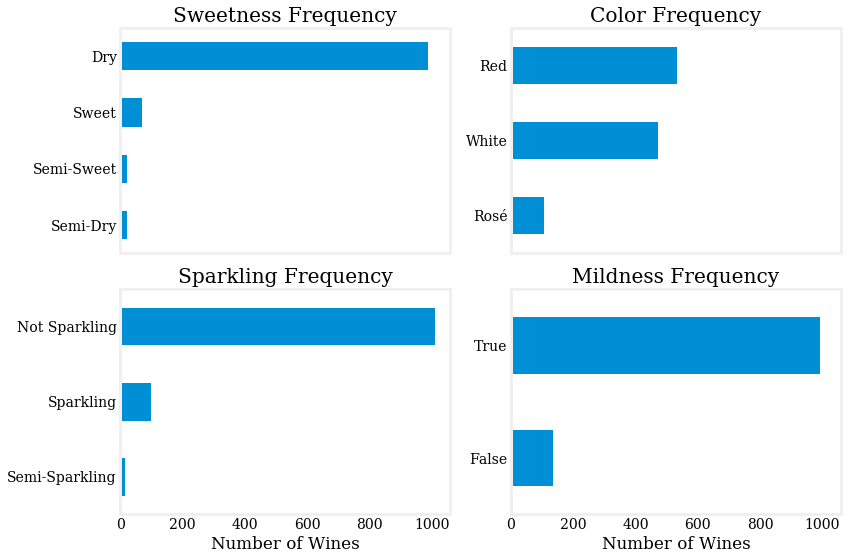

In [15]:
 fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, squeeze=False)

for attr, ax in zip(['sweetness', 'color', 'sparkling', 'is_mild'], (ax1, ax2, ax3, ax4)):
    df[attr].value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax)
    attr_str = 'Mildness' if attr is 'is_mild' else attr.title()
    ax.set(xlabel='Number of Wines', title='{} Frequency'.format(attr_str));
    
fig.set_size_inches((12,8))
fig.tight_layout()


In [16]:
non_varietal_tags = {'Αφρώδης', 'Ημιαφρώδης', 'Ξηρός', 'Ημίξηρος', 'Γλυκός', 'Ημίγλυκος', 'Ήπιος'}
df['varieties'] = df.tags.map(lambda t: t.difference(non_varietal_tags))


In [17]:
def is_not_int(x):
    try:
        int(x)
        return False
    except ValueError:
        return True
    
df['varieties'] = df.varieties.map(lambda x: set(filter(is_not_int, x)))


In [18]:
 df['is_varietal'] = df.varieties.map(set.__len__) == 1
df[['name', 'tags', 'is_varietal', 'varieties']].head()


,name,tags,is_varietal,varieties
0,Riesling Spatlese 2013,"{Riesling, Ημίγλυκος, Ήπιος}",True,{Riesling}
1,Spy Valley - Sauvignon Blanc 2016,"{Ξηρός, Sauvignon Blanc, Ήπιος}",True,{Sauvignon Blanc}
2,Cava Χρυσοχόου 2008,"{Ξηρός, Merlot, Ξινόμαυρο, Ήπιος}",False,"{Ξινόμαυρο, Merlot}"
3,Κτήμα Γεροβασιλείου - Λευκός 2016,"{Ξηρός, Μαλαγουζιά, Ασύρτικο, Ήπιος}",False,"{Μαλαγουζιά, Ασύρτικο}"
4,Landskroon - Pinotage 2013,"{Ξηρός, Pinotage, Ήπιος}",True,{Pinotage}


In [19]:
df.loc[df.is_varietal, 'single_variety'] = df.loc[df.is_varietal, 'varieties'].map(lambda v: next(iter(v)))
df[['name', 'is_varietal', 'varieties', 'single_variety']].head()


,name,is_varietal,varieties,single_variety
0,Riesling Spatlese 2013,True,{Riesling},Riesling
1,Spy Valley - Sauvignon Blanc 2016,True,{Sauvignon Blanc},Sauvignon Blanc
2,Cava Χρυσοχόου 2008,False,"{Ξινόμαυρο, Merlot}",NaN
3,Κτήμα Γεροβασιλείου - Λευκός 2016,False,"{Μαλαγουζιά, Ασύρτικο}",NaN
4,Landskroon - Pinotage 2013,True,{Pinotage},Pinotage


In [20]:
df['is_blend'] = df.varieties.map(set.__len__) >= 2

In [21]:
df.loc[df.is_varietal, 'variety_type'] = 'Varietal'
df.loc[df.is_blend, 'variety_type'] = 'Blend'
df[['name', 'is_varietal', 'single_variety', 'is_blend', 'variety_type', 'variety_type']].head()


,name,is_varietal,single_variety,is_blend,variety_type,variety_type
0,Riesling Spatlese 2013,True,Riesling,False,Varietal,Varietal
1,Spy Valley - Sauvignon Blanc 2016,True,Sauvignon Blanc,False,Varietal,Varietal
2,Cava Χρυσοχόου 2008,False,NaN,True,Blend,Blend
3,Κτήμα Γεροβασιλείου - Λευκός 2016,False,NaN,True,Blend,Blend
4,Landskroon - Pinotage 2013,True,Pinotage,False,Varietal,Varietal


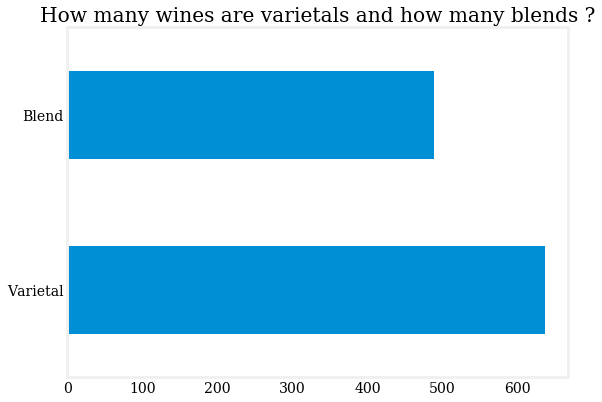

In [22]:
ax = df.is_varietal.replace({True: 'Varietal', False: 'Blend'}).value_counts().plot('barh')
ax.set(title='How many wines are varietals and how many blends ?')


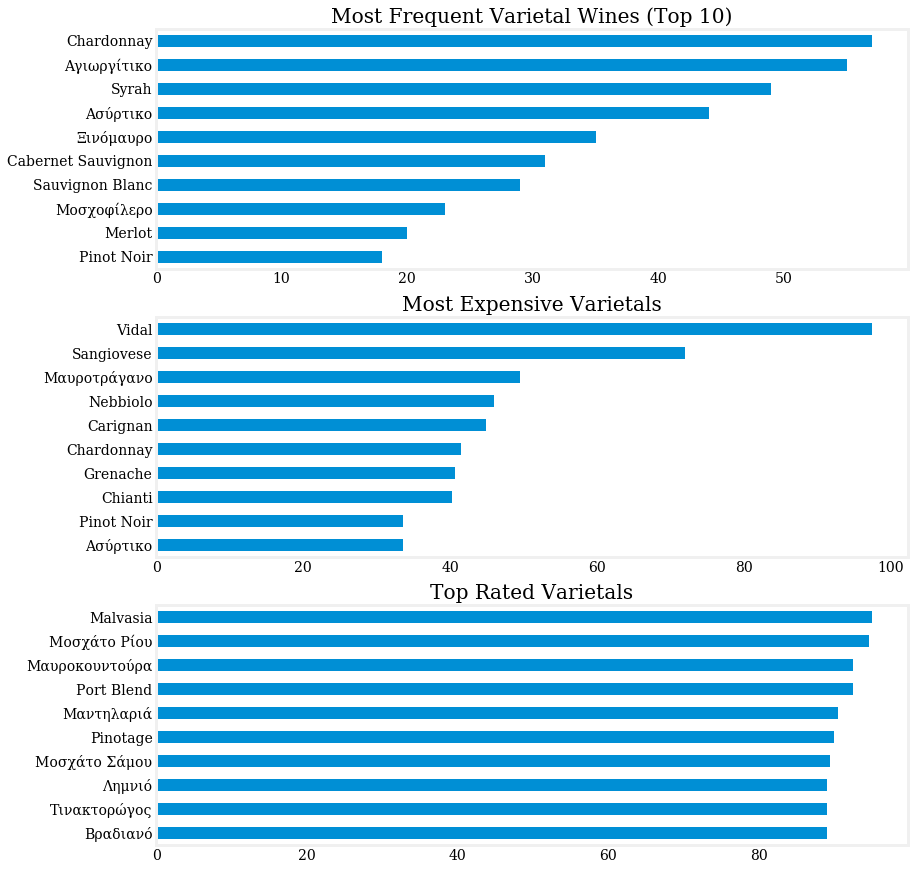

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,14))

varieties_hist = df[df.is_varietal].varieties.map(lambda x: next(iter(x))).value_counts()
varieties_hist.head(10).sort_values(ascending=True).plot('barh', ax=ax1)
ax1.set(title='Most Frequent Varietal Wines (Top 10)');

varietals_mean_price = df[['single_variety', 'price']].groupby('single_variety'
).mean().dropna()['price']
varietals_mean_price.sort_values(ascending=False
).head(10).sort_values(ascending=True).plot('barh', ax=ax2)
ax2.set(title='Most Expensive Varietals', xlabel='', ylabel='');

varietals_mean_rating = df[['single_variety', 'avg_rating']].groupby('single_variety'
).mean().dropna()['avg_rating']
varietals_mean_rating.sort_values(ascending=False
).head(10).sort_values(ascending=True).plot('barh', ax=ax3);
ax3.set(title='Top Rated Varietals', ylabel='');



In [24]:
df.loc[df['is_blend']==True, ['name', 'is_blend', 'varieties']].head()

,name,is_blend,varieties
2,Cava Χρυσοχόου 2008,True,"{Ξινόμαυρο, Merlot}"
3,Κτήμα Γεροβασιλείου - Λευκός 2016,True,"{Μαλαγουζιά, Ασύρτικο}"
7,Ψίθυρος Ερυθρός 2010,True,"{Λιάτικο, Cabernet Sauvignon, Merlot}"
11,Côte Rôtie 2012,True,"{Syrah, Viognier}"
13,Château d' Yquem 2002,True,"{Sauvignon Blanc, Semillon}"


In [25]:
docs = df.loc[df.is_blend, 'varieties'].map(
lambda x: {s.replace(' ', '_') for s in x}
).map(lambda x: ' '.join(x))
docs.head()


2                      Ξινόμαυρο Merlot
3                   Μαλαγουζιά Ασύρτικο
7     Λιάτικο Merlot Cabernet_Sauvignon
11                       Syrah Viognier
13             Semillon Sauvignon_Blanc
Name: varieties, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_model = CountVectorizer(lowercase=False, min_df=.1)
X = count_model.fit_transform(docs)
X


<429x8 sparse matrix of type '<class 'numpy.int64'>'
	with 638 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def create_coocurrence_df(docs):
         # Source: https://stackoverflow.com/a/37822989
    count_model = CountVectorizer(lowercase=False, min_df=.1) # default unigram model
    X = count_model.fit_transform(docs)
    Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
    Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
    ret = pd.DataFrame(Xc.todense())
#, index=count_model.get_feature_names(), 
#columnscou=count_model.get_feature_names())
    ret.index = ret.columns = list(map(lambda f: f.replace('_', ' '), count_model.get_feature_names()))
    return ret

coocurrence = create_coocurrence_df(docs)
coocurrence


,Cabernet Franc,Cabernet Sauvignon,Chardonnay,Merlot,Pinot Noir,Syrah,Αγιωργίτικο,Ασύρτικο
Cabernet Franc,0,42,0,52,0,2,1,0
Cabernet Sauvignon,42,0,0,85,1,24,21,0
Chardonnay,0,0,0,0,46,0,0,8
Merlot,52,85,0,0,1,29,7,0
Pinot Noir,0,1,46,1,0,1,0,0
Syrah,2,24,0,29,1,0,11,0
Αγιωργίτικο,1,21,0,7,0,11,0,0
Ασύρτικο,0,0,8,0,0,0,0,0


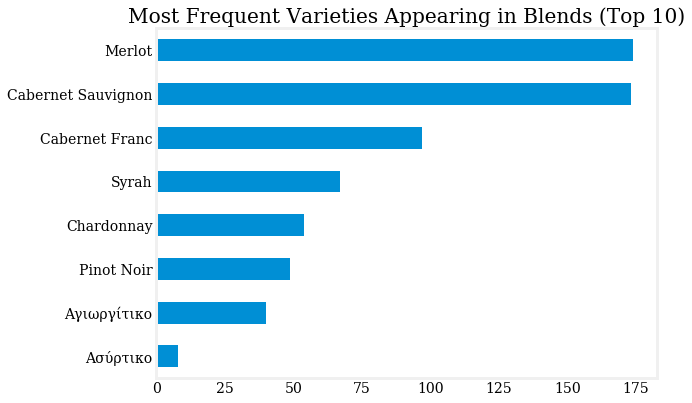

In [28]:
ax = coocurrence.sum().sort_values(ascending=False
).head(10).sort_values(ascending=True).plot(kind='barh')
ax.set(title='Most Frequent Varieties Appearing in Blends (Top 10)')


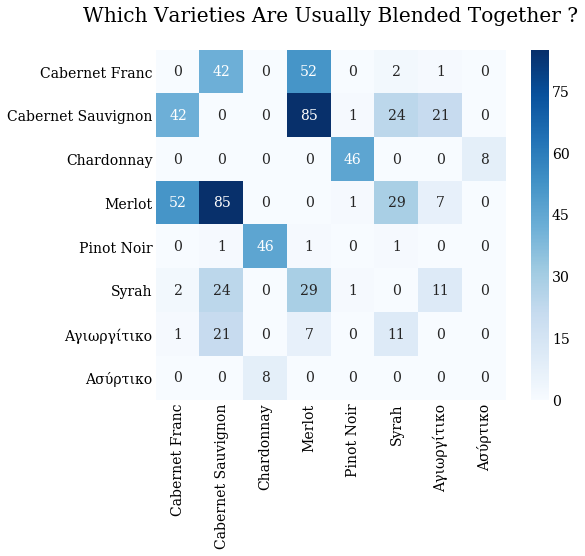

In [29]:
ax = sns.heatmap(coocurrence, square=True, annot=True, fmt="d", cmap='Blues')
ax.set(title='Which varieties are usually blended together ?\n'.title());
plt.gcf().set_size_inches((8,6))


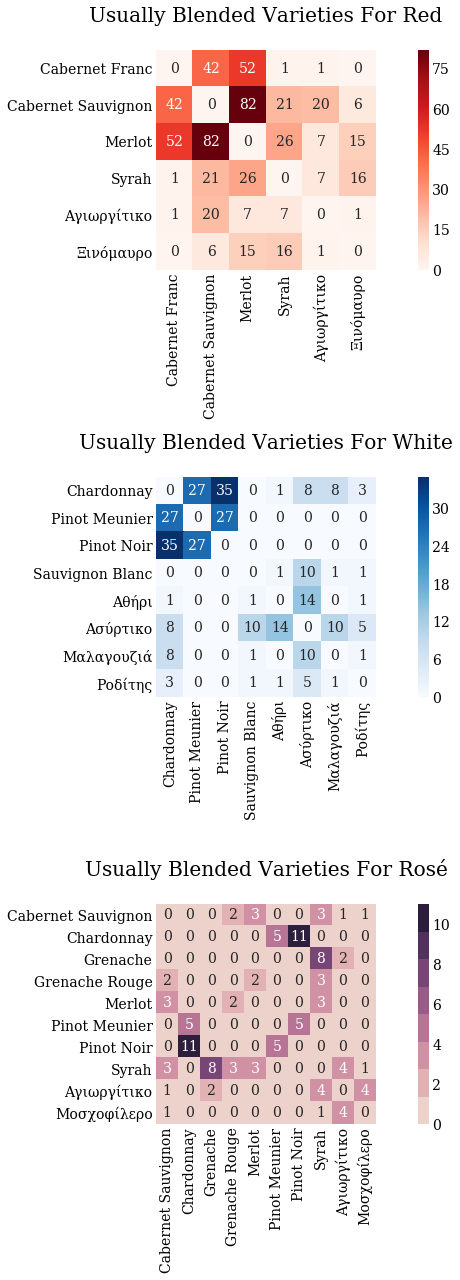

In [30]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 18))
for c, ax in zip(['Red', 'White', 'Rosé'], axes):
    docs = df.loc[df.is_blend & (df.color==c), 'varieties'].map(
lambda x: {s.replace(' ', '_') for s in x}).map(lambda x: ' '.join(x))
    cooc = create_coocurrence_df(docs)
    cmaps = {'Red': 'Reds', 'White': 'Blues', 'Rosé': sns.cubehelix_palette(8)}
    sns.heatmap(cooc, square=True, annot=True, fmt="d", cmap=cmaps.get(c), ax=ax)
    ax.set(title='Usually blended varieties for {}\n'.format(c).title());
plt.tight_layout()
